In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
data=pd.read_csv("../input/bank-note-authentication-uci-data/BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
data["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


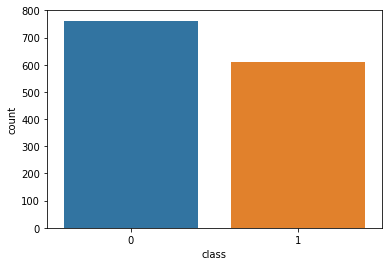

In [6]:
sn.countplot(data["class"])
plt.show()

In [7]:
x=data.drop(["class"],axis=1)
y=data["class"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten

In [10]:
machine=Sequential()
machine.add(Dense(128,input_dim=4,activation="relu"))
machine.add(Dense(64,activation="relu"))
machine.add(Dropout(0.5))
machine.add(Dense(1,activation="sigmoid"))
machine.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
machine.fit(x_train,y_train,epochs=20,verbose=1,batch_size=5)

Epoch 1/20
192/192 [==============================] - 1s 1ms/step - loss: 0.3003 - accuracy: 0.8832
Epoch 2/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9990
Epoch 3/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 4/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9979
Epoch 5/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/20
192/192 [==============================] - 0s 1ms/step - loss: 9.6553e-04 - accuracy: 1.0000
Epoch 9/20
192/192 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/20
192/192 [==============================] - 0s 1ms/step - loss: 6.4468e-04 - accuracy

In [11]:
machine.evaluate(x_test,y_test)

13/13 [==============================] - 0s 933us/step - loss: 4.7405e-05 - accuracy: 1.0000


[4.7404708311660215e-05, 1.0]

In [15]:
Pred=machine.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,Pred)

array([[235,   0],
       [  0, 177]])

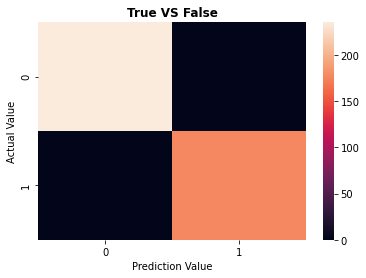

In [24]:
plt.title("True VS False",fontdict={"weight":"bold",})
sn.heatmap(confusion_matrix(y_test,Pred))
plt.ylabel("Actual Value")
plt.xlabel("Prediction Value")
plt.show()

In [25]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

